#Task 1

In [ ]:
!pip install ts2vg
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 4.1 MB/s 


In [ ]:
import pandas as pd
import os
from ts2vg import NaturalVG
from ts2vg import HorizontalVG
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
paths = []

for root, dirs, files in os.walk("/content/drive/MyDrive/FDA/Project 2 Data", topdown=False):
   for name in files:
      paths.append(os.path.join(root, name))

In [ ]:
dataset = {p.split('/')[-1]:pd.read_csv(p) for p in paths}

In [ ]:
subjects = list(range(1,16))
parts = ['head','chest']
activity = ['running','walking','climbingup','climbingdown']
output = pd.DataFrame(columns = ['Method','Subject','Accelerometer_axis','Average_degree','Network_diameter','Average_path_length','Activity','Body_part'])

In [ ]:
for i in subjects:
  for j in activity:
    for k in parts:
      dataset[f's{i}_{j}_{k}.csv'] = dataset[f's{i}_{j}_{k}.csv'].iloc[1000:2024,:]

In [ ]:
ind = 0
for i in subjects:
  for j in activity:
    for k in parts:
      for m in range(2,5):
        g = NaturalVG()
        g.build(dataset[f's{i}_{j}_{k}.csv'].iloc[:,m])
        ig_g = g.as_igraph()
        avg_degree = np.mean(ig_g.degree())
        network_diameter = ig_g.diameter()
        average_path_length = ig_g.average_path_length()
        output.loc[ind,:] = ['NVG',i,m,avg_degree,network_diameter,average_path_length,j,k]
        ind+=1

In [ ]:
for i in subjects:
  for j in activity:
    for k in parts:
      for m in range(2,5):
        g = HorizontalVG()
        g.build(dataset[f's{i}_{j}_{k}.csv'].iloc[:,m])
        ig_g = g.as_igraph()
        avg_degree = np.mean(ig_g.degree())
        network_diameter = ig_g.diameter()
        average_path_length = ig_g.average_path_length()
        output.loc[ind,:] = ['HVG',i,m,avg_degree,network_diameter,average_path_length,j,k]
        ind+=1

In [ ]:
output.loc[output['Accelerometer_axis'] == 2, 'Accelerometer_axis'] = 'attr_x'
output.loc[output['Accelerometer_axis'] == 3, 'Accelerometer_axis'] = 'attr_y'
output.loc[output['Accelerometer_axis'] == 4, 'Accelerometer_axis'] = 'attr_z'

In [ ]:
output.head(50)

,Method,Subject,Accelerometer_axis,Average_degree,Network_diameter,Average_path_length,Activity,Body_part
0,NVG,1,attr_x,9.601562,9,4.617489,running,head
1,NVG,1,attr_y,9.013672,9,4.969256,running,head
2,NVG,1,attr_z,8.146484,10,4.960036,running,head
3,NVG,1,attr_x,8.414062,9,4.307645,running,chest
4,NVG,1,attr_y,11.136719,82,28.651949,running,chest
5,NVG,1,attr_z,8.318359,11,4.644369,running,chest
6,NVG,1,attr_x,12.492188,11,4.518703,walking,head
7,NVG,1,attr_y,13.1875,9,4.281492,walking,head
8,NVG,1,attr_z,12.974609,13,5.14612,walking,head
9,NVG,1,attr_x,11.451172,10,4.441492,walking,chest


In [ ]:
HVG_output = output[output['Method']=='HVG']
NVG_output = output[output['Method']=='NVG']

For walking/running

In [ ]:
NVG_x = NVG_output[NVG_output['Accelerometer_axis']=='attr_x']
NVG_x_walking = NVG_x[NVG_x['Activity']=='walking']
NVG_x_walking_head = NVG_x_walking[NVG_x_walking['Body_part']=='head']

NVG_y = NVG_output[NVG_output['Accelerometer_axis']=='attr_y']
NVG_y_walking = NVG_y[NVG_y['Activity']=='walking']
NVG_y_walking_head = NVG_y_walking[NVG_y_walking['Body_part']=='head']

NVG_z = NVG_output[NVG_output['Accelerometer_axis']=='attr_z']
NVG_z_walking = NVG_z[NVG_z['Activity']=='walking']
NVG_z_walking_head = NVG_z_walking[NVG_z_walking['Body_part']=='head']


NVG_x1 = NVG_output[NVG_output['Accelerometer_axis']=='attr_x']
NVG_x1_running = NVG_x1[NVG_x1['Activity']=='running']
NVG_x1_running_head = NVG_x1_running[NVG_x1_running['Body_part']=='head']

NVG_y1 = NVG_output[NVG_output['Accelerometer_axis']=='attr_y']
NVG_y1_running = NVG_y1[NVG_y1['Activity']=='running']
NVG_y1_running_head = NVG_y1_running[NVG_y1_running['Body_part']=='head']

NVG_z1 = NVG_output[NVG_output['Accelerometer_axis']=='attr_z']
NVG_z1_running = NVG_z1[NVG_z1['Activity']=='running']
NVG_z1_running_head = NVG_z1_running[NVG_z1_running['Body_part']=='head']

Scatter Plot: NVG/attr_x/head

<ipython-input-13-e8179f3c2e99>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


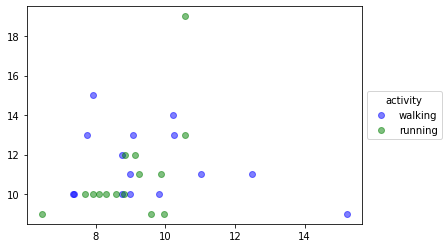

In [ ]:
plt.scatter(NVG_x_walking_head['Average_degree'], NVG_x_walking_head['Network_diameter'] , c = 'blue', alpha=0.5)
plt.scatter(NVG_x1_running_head['Average_degree'], NVG_x1_running_head['Network_diameter'] , c = 'green', alpha=0.5)
ax = plt.subplot()
ax.legend(['walking','running'],
          title ="activity",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

Scatter Plot: NVG/attr_y/head

<ipython-input-14-2757db04d7ea>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


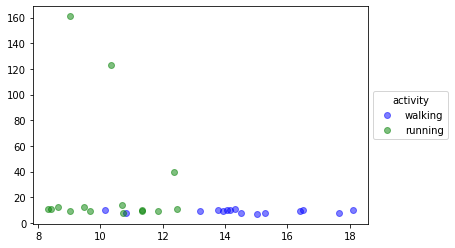

In [ ]:
plt.scatter(NVG_y_walking_head['Average_degree'], NVG_y_walking_head['Network_diameter'] , c = 'blue', alpha=0.5)
plt.scatter(NVG_y1_running_head['Average_degree'], NVG_y1_running_head['Network_diameter'] , c = 'green', alpha=0.5)
ax = plt.subplot()
ax.legend(['walking','running'],
          title ="activity",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

Scatter Plot: NVG/attr_z/head

<ipython-input-15-0276dfcd68a1>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


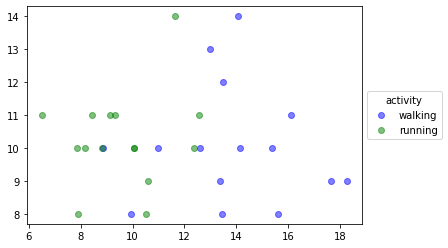

In [ ]:
plt.scatter(NVG_z_walking_head['Average_degree'], NVG_z_walking_head['Network_diameter'] , c = 'blue', alpha=0.5)
plt.scatter(NVG_z1_running_head['Average_degree'], NVG_z1_running_head['Network_diameter'] , c = 'green', alpha=0.5)
ax = plt.subplot()
ax.legend(['walking','running'],
          title ="activity",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

In [ ]:
NVG_x = NVG_output[NVG_output['Accelerometer_axis']=='attr_x']
NVG_x_walking = NVG_x[NVG_x['Activity']=='walking']
NVG_x_walking_chest = NVG_x_walking[NVG_x_walking['Body_part']=='chest']

NVG_y = NVG_output[NVG_output['Accelerometer_axis']=='attr_y']
NVG_y_walking = NVG_y[NVG_y['Activity']=='walking']
NVG_y_walking_chest = NVG_y_walking[NVG_y_walking['Body_part']=='chest']

NVG_z = NVG_output[NVG_output['Accelerometer_axis']=='attr_z']
NVG_z_walking = NVG_z[NVG_z['Activity']=='walking']
NVG_z_walking_chest = NVG_z_walking[NVG_z_walking['Body_part']=='chest']


NVG_x1 = NVG_output[NVG_output['Accelerometer_axis']=='attr_x']
NVG_x1_running = NVG_x1[NVG_x1['Activity']=='running']
NVG_x1_running_chest = NVG_x1_running[NVG_x1_running['Body_part']=='chest']

NVG_y1 = NVG_output[NVG_output['Accelerometer_axis']=='attr_y']
NVG_y1_running = NVG_y1[NVG_y1['Activity']=='running']
NVG_y1_running_chest = NVG_y1_running[NVG_y1_running['Body_part']=='chest']

NVG_z1 = NVG_output[NVG_output['Accelerometer_axis']=='attr_z']
NVG_z1_running = NVG_z1[NVG_z1['Activity']=='running']
NVG_z1_running_chest = NVG_z1_running[NVG_z1_running['Body_part']=='chest']

Scatter Plot: NVG/attr_x/chest

<ipython-input-17-8b63624e2851>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


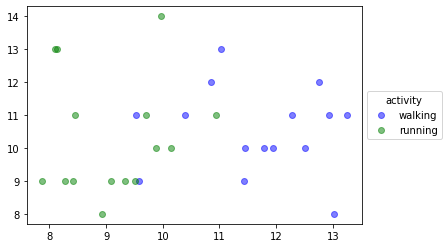

In [ ]:
plt.scatter(NVG_x_walking_chest['Average_degree'], NVG_x_walking_chest['Network_diameter'] , c = 'blue', alpha=0.5)
plt.scatter(NVG_x1_running_chest['Average_degree'], NVG_x1_running_chest['Network_diameter'] , c = 'green', alpha=0.5)
ax = plt.subplot()
ax.legend(['walking','running'],
          title ="activity",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

Scatter Plot: NVG/attr_y/chest

<ipython-input-18-f5e631fdc4c9>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


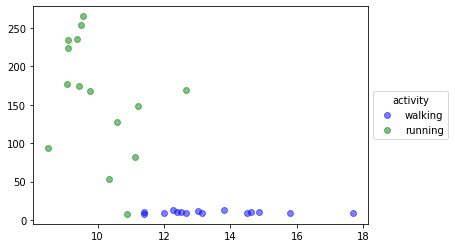

In [ ]:
plt.scatter(NVG_y_walking_chest['Average_degree'], NVG_y_walking_chest['Network_diameter'] , c = 'blue', alpha=0.5)
plt.scatter(NVG_y1_running_chest['Average_degree'], NVG_y1_running_chest['Network_diameter'] , c = 'green', alpha=0.5)
ax = plt.subplot()
ax.legend(['walking','running'],
          title ="activity",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

Scatter Plot: NVG/attr_z/chest

<ipython-input-19-b18942293279>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


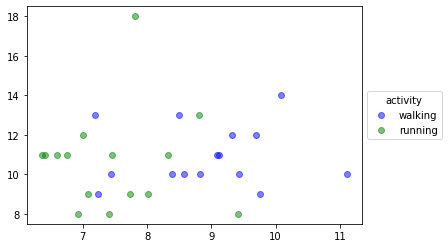

In [ ]:
plt.scatter(NVG_z_walking_chest['Average_degree'], NVG_z_walking_chest['Network_diameter'] , c = 'blue', alpha=0.5)
plt.scatter(NVG_z1_running_chest['Average_degree'], NVG_z1_running_chest['Network_diameter'] , c = 'green', alpha=0.5)
ax = plt.subplot()
ax.legend(['walking','running'],
          title ="activity",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

In [ ]:
HVG_x = HVG_output[HVG_output['Accelerometer_axis']=='attr_x']
HVG_x_walking = HVG_x[HVG_x['Activity']=='walking']
HVG_x_walking_head = HVG_x_walking[HVG_x_walking['Body_part']=='head']

HVG_y = HVG_output[HVG_output['Accelerometer_axis']=='attr_y']
HVG_y_walking = HVG_y[HVG_y['Activity']=='walking']
HVG_y_walking_head = HVG_y_walking[HVG_y_walking['Body_part']=='head']

HVG_z = HVG_output[HVG_output['Accelerometer_axis']=='attr_z']
HVG_z_walking = HVG_z[HVG_z['Activity']=='walking']
HVG_z_walking_head = HVG_z_walking[HVG_z_walking['Body_part']=='head']


HVG_x1 = HVG_output[HVG_output['Accelerometer_axis']=='attr_x']
HVG_x1_running = HVG_x1[HVG_x1['Activity']=='running']
HVG_x1_running_head = HVG_x1_running[HVG_x1_running['Body_part']=='head']

HVG_y1 = HVG_output[HVG_output['Accelerometer_axis']=='attr_y']
HVG_y1_running = HVG_y1[HVG_y1['Activity']=='running']
HVG_y1_running_head = HVG_y1_running[HVG_y1_running['Body_part']=='head']

HVG_z1 = HVG_output[HVG_output['Accelerometer_axis']=='attr_z']
HVG_z1_running = HVG_z1[HVG_z1['Activity']=='running']
HVG_z1_running_head = HVG_z1_running[HVG_z1_running['Body_part']=='head']

Scatter Plot: HVG/attr_x/head

<ipython-input-21-16b8669492fb>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


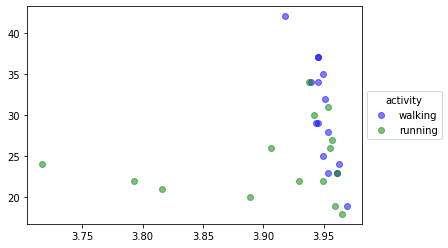

In [ ]:
plt.scatter(HVG_x_walking_head['Average_degree'], HVG_x_walking_head['Network_diameter'] , c = 'blue', alpha=0.5)
plt.scatter(HVG_x1_running_head['Average_degree'], HVG_x1_running_head['Network_diameter'] , c = 'green', alpha=0.5)
ax = plt.subplot()
ax.legend(['walking','running'],
          title ="activity",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

Scatter Plot: HVG/attr_y/head

<ipython-input-22-4397dc469917>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


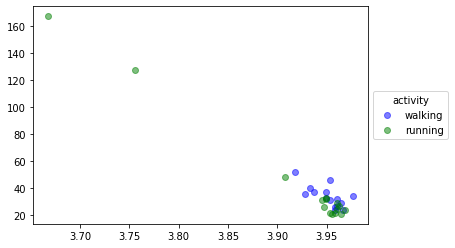

In [ ]:
plt.scatter(HVG_y_walking_head['Average_degree'], HVG_y_walking_head['Network_diameter'] , c = 'blue', alpha=0.5)
plt.scatter(HVG_y1_running_head['Average_degree'], HVG_y1_running_head['Network_diameter'] , c = 'green', alpha=0.5)
ax = plt.subplot()
ax.legend(['walking','running'],
          title ="activity",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

Scatter Plot: HVG/attr_z/head

<ipython-input-23-6f6a8f093209>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


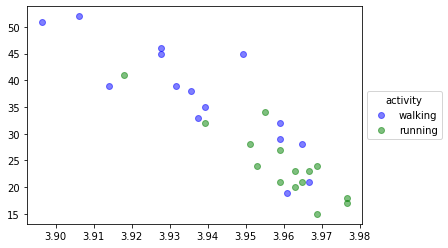

In [ ]:
plt.scatter(HVG_z_walking_head['Average_degree'], HVG_z_walking_head['Network_diameter'] , c = 'blue', alpha=0.5)
plt.scatter(HVG_z1_running_head['Average_degree'], HVG_z1_running_head['Network_diameter'] , c = 'green', alpha=0.5)
ax = plt.subplot()
ax.legend(['walking','running'],
          title ="activity",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

In [ ]:
HVG_x = HVG_output[HVG_output['Accelerometer_axis']=='attr_x']
HVG_x_walking = HVG_x[HVG_x['Activity']=='walking']
HVG_x_walking_chest = HVG_x_walking[HVG_x_walking['Body_part']=='chest']

HVG_y = HVG_output[HVG_output['Accelerometer_axis']=='attr_y']
HVG_y_walking = HVG_y[HVG_y['Activity']=='walking']
HVG_y_walking_chest = HVG_y_walking[HVG_y_walking['Body_part']=='chest']

HVG_z = HVG_output[HVG_output['Accelerometer_axis']=='attr_z']
HVG_z_walking = HVG_z[HVG_z['Activity']=='walking']
HVG_z_walking_chest = HVG_z_walking[HVG_z_walking['Body_part']=='chest']


HVG_x1 = HVG_output[HVG_output['Accelerometer_axis']=='attr_x']
HVG_x1_running = HVG_x1[HVG_x1['Activity']=='running']
HVG_x1_running_chest = HVG_x1_running[HVG_x1_running['Body_part']=='chest']

HVG_y1 = HVG_output[HVG_output['Accelerometer_axis']=='attr_y']
HVG_y1_running = HVG_y1[HVG_y1['Activity']=='running']
HVG_y1_running_chest = HVG_y1_running[HVG_y1_running['Body_part']=='chest']

HVG_z1 = HVG_output[HVG_output['Accelerometer_axis']=='attr_z']
HVG_z1_running = HVG_z1[HVG_z1['Activity']=='running']
HVG_z1_running_chest = HVG_z1_running[HVG_z1_running['Body_part']=='chest']

Scatter Plot: HVG/attr_x/chest

<ipython-input-25-eab11aa1c365>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


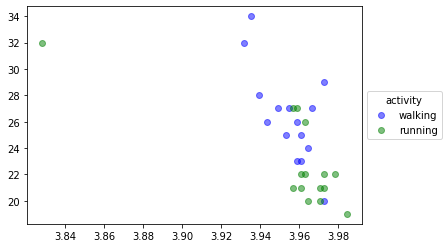

In [ ]:
plt.scatter(HVG_x_walking_chest['Average_degree'], HVG_x_walking_chest['Network_diameter'] , c = 'blue', alpha=0.5)
plt.scatter(HVG_x1_running_chest['Average_degree'], HVG_x1_running_chest['Network_diameter'] , c = 'green', alpha=0.5)
ax = plt.subplot()
ax.legend(['walking','running'],
          title ="activity",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

Scatter Plot: HVG/attr_y/chest

<ipython-input-26-6096867c7060>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


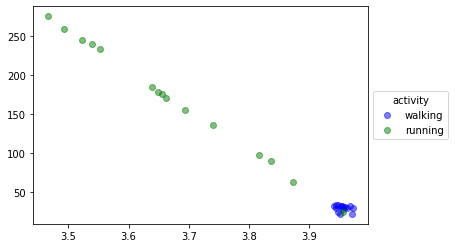

In [ ]:
plt.scatter(HVG_y_walking_chest['Average_degree'], HVG_y_walking_chest['Network_diameter'] , c = 'blue', alpha=0.5)
plt.scatter(HVG_y1_running_chest['Average_degree'], HVG_y1_running_chest['Network_diameter'] , c = 'green', alpha=0.5)
ax = plt.subplot()
ax.legend(['walking','running'],
          title ="activity",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

Scatter Plot: HVG/attr_z/chest

<ipython-input-27-3b77bff4061d>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


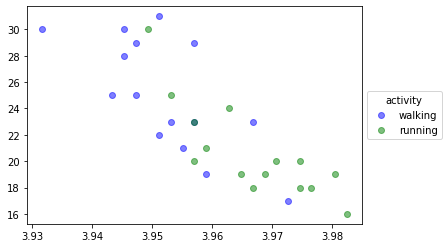

In [ ]:
plt.scatter(HVG_z_walking_chest['Average_degree'], HVG_z_walking_chest['Network_diameter'] , c = 'blue', alpha=0.5)
plt.scatter(HVG_z1_running_chest['Average_degree'], HVG_z1_running_chest['Network_diameter'] , c = 'green', alpha=0.5)
ax = plt.subplot()
ax.legend(['walking','running'],
          title ="activity",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

For climbingup/climbingdown

In [ ]:
NVG_x = NVG_output[NVG_output['Accelerometer_axis']=='attr_x']
NVG_x_climbingdown = NVG_x[NVG_x['Activity']=='climbingdown']
NVG_x_climbingdown_chest = NVG_x_climbingdown[NVG_x_climbingdown['Body_part']=='chest']

NVG_y = NVG_output[NVG_output['Accelerometer_axis']=='attr_y']
NVG_y_climbingdown = NVG_y[NVG_y['Activity']=='climbingdown']
NVG_y_climbingdown_chest = NVG_y_climbingdown[NVG_y_climbingdown['Body_part']=='chest']

NVG_z = NVG_output[NVG_output['Accelerometer_axis']=='attr_z']
NVG_z_climbingdown = NVG_z[NVG_z['Activity']=='climbingdown']
NVG_z_climbingdown_chest = NVG_z_climbingdown[NVG_z_climbingdown['Body_part']=='chest']


NVG_x1 = NVG_output[NVG_output['Accelerometer_axis']=='attr_x']
NVG_x1_climbingup = NVG_x1[NVG_x1['Activity']=='climbingup']
NVG_x1_climbingup_chest = NVG_x1_climbingup[NVG_x1_climbingup['Body_part']=='chest']

NVG_y1 = NVG_output[NVG_output['Accelerometer_axis']=='attr_y']
NVG_y1_climbingup = NVG_y1[NVG_y1['Activity']=='climbingup']
NVG_y1_climbingup_chest = NVG_y1_climbingup[NVG_y1_climbingup['Body_part']=='chest']

NVG_z1 = NVG_output[NVG_output['Accelerometer_axis']=='attr_z']
NVG_z1_climbingup = NVG_z1[NVG_z1['Activity']=='climbingup']
NVG_z1_climbingup_chest = NVG_z1_climbingup[NVG_z1_climbingup['Body_part']=='chest']

Scatter plot: NVG/attr_z/chest

<ipython-input-34-654be6e8dea0>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


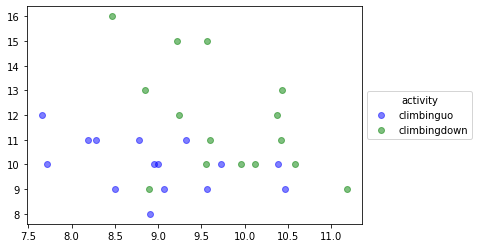

In [ ]:
plt.scatter(NVG_z_climbingdown_chest['Average_degree'], NVG_z_climbingdown_chest['Network_diameter'] , c = 'blue', alpha=0.5)
plt.scatter(NVG_z1_climbingup_chest['Average_degree'], NVG_z1_climbingup_chest['Network_diameter'] , c = 'green', alpha=0.5)
ax = plt.subplot()
ax.legend(['climbinguo','climbingdown'],
          title ="activity",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

Scatter Plot: NVG/attr_y/chest

<ipython-input-35-08a14d437261>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


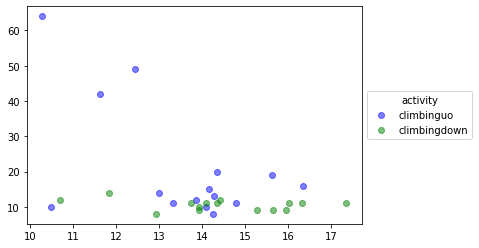

In [ ]:
plt.scatter(NVG_y_climbingdown_chest['Average_degree'], NVG_y_climbingdown_chest['Network_diameter'] , c = 'blue', alpha=0.5)
plt.scatter(NVG_y1_climbingup_chest['Average_degree'], NVG_y1_climbingup_chest['Network_diameter'] , c = 'green', alpha=0.5)
ax = plt.subplot()
ax.legend(['climbinguo','climbingdown'],
          title ="activity",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

Sactter Plot: NVG/attr_x/chest

<ipython-input-36-9477ffea9995>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


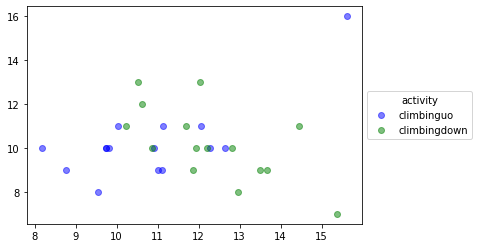

In [ ]:
plt.scatter(NVG_x_climbingdown_chest['Average_degree'], NVG_x_climbingdown_chest['Network_diameter'] , c = 'blue', alpha=0.5)
plt.scatter(NVG_x1_climbingup_chest['Average_degree'], NVG_x1_climbingup_chest['Network_diameter'] , c = 'green', alpha=0.5)
ax = plt.subplot()
ax.legend(['climbinguo','climbingdown'],
          title ="activity",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

In [ ]:
NVG_x = NVG_output[NVG_output['Accelerometer_axis']=='attr_x']
NVG_x_climbingdown = NVG_x[NVG_x['Activity']=='climbingdown']
NVG_x_climbingdown_head = NVG_x_climbingdown[NVG_x_climbingdown['Body_part']=='head']

NVG_y = NVG_output[NVG_output['Accelerometer_axis']=='attr_y']
NVG_y_climbingdown = NVG_y[NVG_y['Activity']=='climbingdown']
NVG_y_climbingdown_head = NVG_y_climbingdown[NVG_y_climbingdown['Body_part']=='head']

NVG_z = NVG_output[NVG_output['Accelerometer_axis']=='attr_z']
NVG_z_climbingdown = NVG_z[NVG_z['Activity']=='climbingdown']
NVG_z_climbingdown_head = NVG_z_climbingdown[NVG_z_climbingdown['Body_part']=='head']


NVG_x1 = NVG_output[NVG_output['Accelerometer_axis']=='attr_x']
NVG_x1_climbingup = NVG_x1[NVG_x1['Activity']=='climbingup']
NVG_x1_climbingup_head = NVG_x1_climbingup[NVG_x1_climbingup['Body_part']=='head']

NVG_y1 = NVG_output[NVG_output['Accelerometer_axis']=='attr_y']
NVG_y1_climbingup = NVG_y1[NVG_y1['Activity']=='climbingup']
NVG_y1_climbingup_head = NVG_y1_climbingup[NVG_y1_climbingup['Body_part']=='head']

NVG_z1 = NVG_output[NVG_output['Accelerometer_axis']=='attr_z']
NVG_z1_climbingup = NVG_z1[NVG_z1['Activity']=='climbingup']
NVG_z1_climbingup_head = NVG_z1_climbingup[NVG_z1_climbingup['Body_part']=='head']

Sactter plot: NVG/attr_z/head

<ipython-input-38-e53526d0a3a5>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


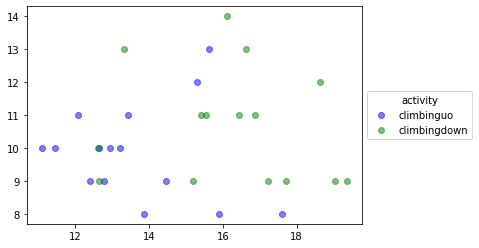

In [ ]:
plt.scatter(NVG_z_climbingdown_head['Average_degree'], NVG_z_climbingdown_head['Network_diameter'] , c = 'blue', alpha=0.5)
plt.scatter(NVG_z1_climbingup_head['Average_degree'], NVG_z1_climbingup_head['Network_diameter'] , c = 'green', alpha=0.5)
ax = plt.subplot()
ax.legend(['climbinguo','climbingdown'],
          title ="activity",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

Sactter plot: NVG/attr_y/head

<ipython-input-39-4270ad8dcd8e>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


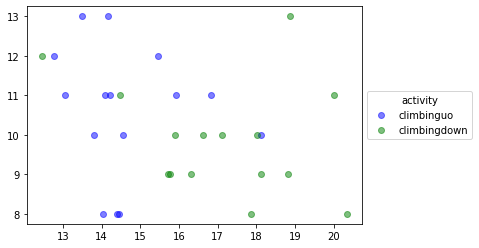

In [ ]:
plt.scatter(NVG_y_climbingdown_head['Average_degree'], NVG_y_climbingdown_head['Network_diameter'] , c = 'blue', alpha=0.5)
plt.scatter(NVG_y1_climbingup_head['Average_degree'], NVG_y1_climbingup_head['Network_diameter'] , c = 'green', alpha=0.5)
ax = plt.subplot()
ax.legend(['climbinguo','climbingdown'],
          title ="activity",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

Sactter plot: NVG/attr_x/head

<ipython-input-40-69add581f844>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


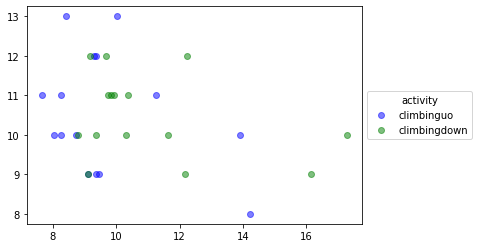

In [ ]:
plt.scatter(NVG_x_climbingdown_head['Average_degree'], NVG_x_climbingdown_head['Network_diameter'] , c = 'blue', alpha=0.5)
plt.scatter(NVG_x1_climbingup_head['Average_degree'], NVG_x1_climbingup_head['Network_diameter'] , c = 'green', alpha=0.5)
ax = plt.subplot()
ax.legend(['climbinguo','climbingdown'],
          title ="activity",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

In [ ]:
HVG_x = HVG_output[HVG_output['Accelerometer_axis']=='attr_x']
HVG_x_climbingdown = HVG_x[HVG_x['Activity']=='climbingdown']
HVG_x_climbingdown_chest = HVG_x_climbingdown[HVG_x_climbingdown['Body_part']=='chest']

HVG_y = HVG_output[HVG_output['Accelerometer_axis']=='attr_y']
HVG_y_climbingdown = HVG_y[HVG_y['Activity']=='climbingdown']
HVG_y_climbingdown_chest = HVG_y_climbingdown[HVG_y_climbingdown['Body_part']=='chest']

HVG_z = HVG_output[HVG_output['Accelerometer_axis']=='attr_z']
HVG_z_climbingdown = HVG_z[HVG_z['Activity']=='climbingdown']
HVG_z_climbingdown_chest = HVG_z_climbingdown[HVG_z_climbingdown['Body_part']=='chest']


HVG_x1 = HVG_output[HVG_output['Accelerometer_axis']=='attr_x']
HVG_x1_climbingup = HVG_x1[HVG_x1['Activity']=='climbingup']
HVG_x1_climbingup_chest = HVG_x1_climbingup[HVG_x1_climbingup['Body_part']=='chest']

HVG_y1 = HVG_output[HVG_output['Accelerometer_axis']=='attr_y']
HVG_y1_climbingup = HVG_y1[HVG_y1['Activity']=='climbingup']
HVG_y1_climbingup_chest = HVG_y1_climbingup[HVG_y1_climbingup['Body_part']=='chest']

HVG_z1 = HVG_output[HVG_output['Accelerometer_axis']=='attr_z']
HVG_z1_climbingup = HVG_z1[HVG_z1['Activity']=='climbingup']
HVG_z1_climbingup_chest = HVG_z1_climbingup[HVG_z1_climbingup['Body_part']=='chest']

Scatter plot: HVG/attr_x/chest

<ipython-input-42-3051d797fa7f>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


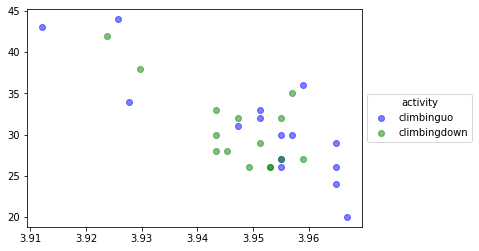

In [ ]:
plt.scatter(HVG_x_climbingdown_chest['Average_degree'], HVG_x_climbingdown_chest['Network_diameter'] , c = 'blue', alpha=0.5)
plt.scatter(HVG_x1_climbingup_chest['Average_degree'], HVG_x1_climbingup_chest['Network_diameter'] , c = 'green', alpha=0.5)
ax = plt.subplot()
ax.legend(['climbinguo','climbingdown'],
          title ="activity",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

Scatter plot: HVG/attr_y/chest

<ipython-input-43-c3dd0065646a>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


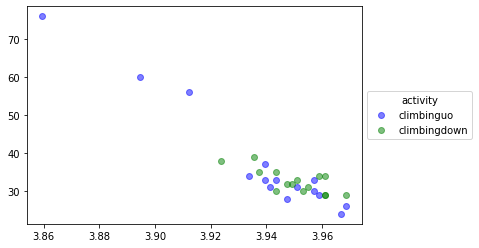

In [ ]:
plt.scatter(HVG_y_climbingdown_chest['Average_degree'], HVG_y_climbingdown_chest['Network_diameter'] , c = 'blue', alpha=0.5)
plt.scatter(HVG_y1_climbingup_chest['Average_degree'], HVG_y1_climbingup_chest['Network_diameter'] , c = 'green', alpha=0.5)
ax = plt.subplot()
ax.legend(['climbinguo','climbingdown'],
          title ="activity",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

Scatter plot: HVG/attr_z/chest

<ipython-input-44-70949aa93c55>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


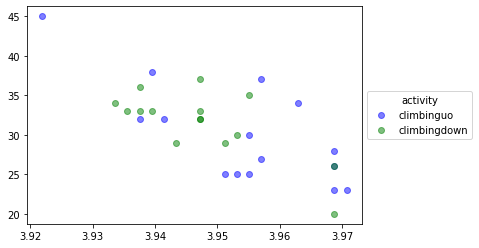

In [ ]:
plt.scatter(HVG_z_climbingdown_chest['Average_degree'], HVG_z_climbingdown_chest['Network_diameter'] , c = 'blue', alpha=0.5)
plt.scatter(HVG_z1_climbingup_chest['Average_degree'], HVG_z1_climbingup_chest['Network_diameter'] , c = 'green', alpha=0.5)
ax = plt.subplot()
ax.legend(['climbinguo','climbingdown'],
          title ="activity",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

In [ ]:
HVG_x = HVG_output[HVG_output['Accelerometer_axis']=='attr_x']
HVG_x_climbingdown = HVG_x[HVG_x['Activity']=='climbingdown']
HVG_x_climbingdown_head = HVG_x_climbingdown[HVG_x_climbingdown['Body_part']=='head']

HVG_y = HVG_output[HVG_output['Accelerometer_axis']=='attr_y']
HVG_y_climbingdown = HVG_y[HVG_y['Activity']=='climbingdown']
HVG_y_climbingdown_head = HVG_y_climbingdown[HVG_y_climbingdown['Body_part']=='head']

HVG_z = HVG_output[HVG_output['Accelerometer_axis']=='attr_z']
HVG_z_climbingdown = HVG_z[HVG_z['Activity']=='climbingdown']
HVG_z_climbingdown_head = HVG_z_climbingdown[HVG_z_climbingdown['Body_part']=='head']


HVG_x1 = HVG_output[HVG_output['Accelerometer_axis']=='attr_x']
HVG_x1_climbingup = HVG_x1[HVG_x1['Activity']=='climbingup']
HVG_x1_climbingup_head = HVG_x1_climbingup[HVG_x1_climbingup['Body_part']=='head']

HVG_y1 = HVG_output[HVG_output['Accelerometer_axis']=='attr_y']
HVG_y1_climbingup = HVG_y1[HVG_y1['Activity']=='climbingup']
HVG_y1_climbingup_head = HVG_y1_climbingup[HVG_y1_climbingup['Body_part']=='head']

HVG_z1 = HVG_output[HVG_output['Accelerometer_axis']=='attr_z']
HVG_z1_climbingup = HVG_z1[HVG_z1['Activity']=='climbingup']
HVG_z1_climbingup_head = HVG_z1_climbingup[HVG_z1_climbingup['Body_part']=='head']

Scatter plot: HVG/attr_x/head

<ipython-input-46-95db365b1536>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


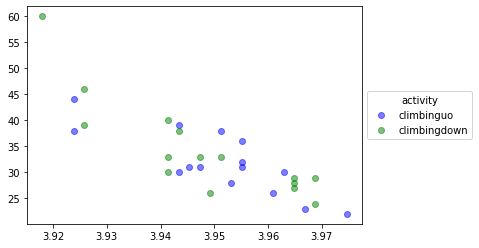

In [ ]:
plt.scatter(HVG_x_climbingdown_head['Average_degree'], HVG_x_climbingdown_head['Network_diameter'] , c = 'blue', alpha=0.5)
plt.scatter(HVG_x1_climbingup_head['Average_degree'], HVG_x1_climbingup_head['Network_diameter'] , c = 'green', alpha=0.5)
ax = plt.subplot()
ax.legend(['climbinguo','climbingdown'],
          title ="activity",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

Scatter plot: HVG/attr_y/head

<ipython-input-47-d5a43bba4bf0>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


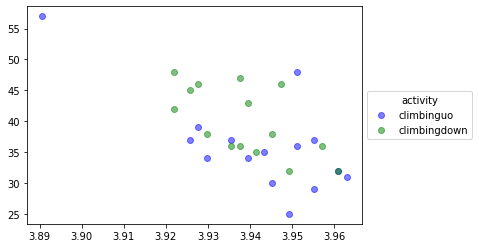

In [ ]:
plt.scatter(HVG_y_climbingdown_head['Average_degree'], HVG_y_climbingdown_head['Network_diameter'] , c = 'blue', alpha=0.5)
plt.scatter(HVG_y1_climbingup_head['Average_degree'], HVG_y1_climbingup_head['Network_diameter'] , c = 'green', alpha=0.5)
ax = plt.subplot()
ax.legend(['climbinguo','climbingdown'],
          title ="activity",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

Scatter plot: HVG/attr_z/head

<ipython-input-48-4d82a12efd7f>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


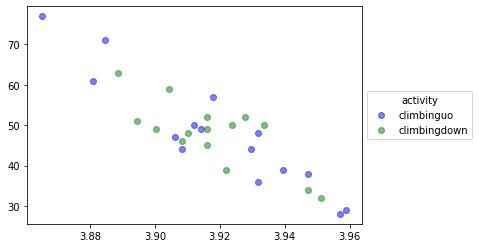

In [ ]:
plt.scatter(HVG_z_climbingdown_head['Average_degree'], HVG_z_climbingdown_head['Network_diameter'] , c = 'blue', alpha=0.5)
plt.scatter(HVG_z1_climbingup_head['Average_degree'], HVG_z1_climbingup_head['Network_diameter'] , c = 'green', alpha=0.5)
ax = plt.subplot()
ax.legend(['climbinguo','climbingdown'],
          title ="activity",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

#Task 2

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#### Subjects Datasets (Chest/Head)

In [ ]:
movements = ["acc_climbingdown_csv","acc_climbingup_csv","acc_running_csv","acc_walking_csv"]
movement_names =["Climbing Down","Climbing Up","Running","Walking"]
bodyparts = ["chest","head"]
embeddedDimension=[3,4,5,6]
embeddedDelay =  [1,2,3]
signalLength = [1024,2048,4096]

permutationsList = []
for i in embeddedDimension:
    for j in embeddedDelay:
        permutationsList.append([i,j])
print(permutationsList)


[[3, 1], [3, 2], [3, 3], [4, 1], [4, 2], [4, 3], [5, 1], [5, 2], [5, 3], [6, 1], [6, 2], [6, 3]]


In [ ]:
for each in permutationsList:
    print(each[1])

1
2
3
1
2
3
1
2
3
1
2
3


In [ ]:
def subjectsDf(x):
    subjectDatasets=[]
    for j in movements:
        for i in bodyparts:
            df_data = pd.read_csv(f'subjects/subject{x}/{j}/{i}.csv')
            df_data.drop(columns=df_data.columns[0], axis=1, inplace=True)
            subjectDatasets.append(df_data)
    return subjectDatasets

def allSubjectsDatasets():
    alldatasets= []
    for i in range(1,16):
        alldatasets.append(subjectsDf(i))
    return alldatasets



In [ ]:
allDS = allSubjectsDatasets()

In [ ]:
def timeseriesLoad(df):
    ls = []
    ls.append(df['attr_x'].tolist())
    ls.append(df['attr_y'].tolist())
    ls.append(df['attr_z'].tolist())
    return ls



### Shannon Entropy Computation

In [ ]:
def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(abs(freq))
    sh_entropy = -sh_entropy
    return sh_entropy


In [ ]:
counter = 1
for df in allDS:
    movement_tracker = 0
    body_part_tracker = 0
    for dfa in df:
        ts = (timeseriesLoad(dfa))
        for i in range(len(ts)):
            if i == 0:
                print(f"Subject{ counter} X attribute for {movement_names[movement_tracker]} for {bodyparts[body_part_tracker]}   Shannon Entropy : {s_entropy(ts[i])}")
            elif i == 1:
                print(f"Subject{ counter} Y attribute for {movement_names[movement_tracker]} for {bodyparts[body_part_tracker]}   Shannon Entropy : {s_entropy(ts[i])}")
            elif i == 2:
                print(f"Subject{ counter} Z attribute for {movement_names[movement_tracker]} for {bodyparts[body_part_tracker]}   Shannon Entropy : {s_entropy(ts[i])}")
                if body_part_tracker == 1:
                    body_part_tracker = 0
                    movement_tracker+=1
                else: body_part_tracker+=1
        if movement_tracker == 4:
            movement_tracker = 0
    counter+=1


### Ordinal Patterns Computation

In [ ]:
def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts)

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :]
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))



In [ ]:
def odpPerSubject(x):
    odpsubj= []
    subject = subjectsDf(x)
    for i in range(len(subject)):
        ts = timeseriesLoad(subject[i])
        for entry in permutationsList:
            for col in ts:
                op = ordinal_patterns(col,entry[0],entry[1])
                odpsubj.append(op)
                # print(f"Ordinal Patterns for DATASET {i}: {op}")
    return odpsubj

In [ ]:
odpList = []
for i in range(1,16):
    odpList.append(odpPerSubject(i))

In [ ]:
len(odpList)

15

In [ ]:
print(subjectsDf(1)[4])

           attr_time    attr_x    attr_y    attr_z
0      1435995489003 -1.505354  9.486425  0.623091
1      1435995489024 -1.352125  9.406818  0.649427
2      1435995489043 -1.404199  9.419987  0.721852
3      1435995489063 -1.472434  9.469667  0.625485
4      1435995489085 -1.410185  9.442732  0.565032
...              ...       ...       ...       ...
30610  1435996101818  0.149039  9.472060  1.923143
30611  1435996101875  0.056862  9.595362  1.705270
30612  1435996101876 -0.069432  9.600749  1.802834
30613  1435996101877 -0.275333  9.506178  1.745373
30614  1435996101896 -0.292691  9.434352  1.555633

[30615 rows x 4 columns]


### Permutation Entropy

In [ ]:
def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:])

In [ ]:
def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

### Complexity Computation

In [ ]:
def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)


## Subject 1

Permutation entropy

In [ ]:
p_entropy1 = []
for i in odpList[0]:
    p_entropy1.append(p_entropy(i))
p_entropy1

Complexity

In [ ]:
complexity1 = []
for i in odpList[0]:
    complexity1.append(complexity(i))
complexity1

## Subject 2

Permutation Entropy

In [ ]:
p_entropy2 = []
for i in odpList[1]:
    p_entropy2.append(p_entropy(i))
p_entropy2

Complexity

In [ ]:
complexity2 = []
for i in odpList[1]:
    complexity2.append(complexity(i))
complexity2

## Subject 3

Permutation Entropy

In [ ]:
p_entropy3 = []
for i in odpList[2]:
    p_entropy3.append(p_entropy(i))
p_entropy3

Complexity

In [ ]:
complexity3 = []
for i in odpList[2]:
    complexity3.append(complexity(i))
complexity3

## Subject 4

Permutation

In [ ]:
p_entropy4 = []
for i in odpList[3]:
    p_entropy4.append(p_entropy(i))
p_entropy4

 Complexity

In [ ]:
complexity4 = []
for i in odpList[3]:
    complexity4.append(complexity(i))
complexity4

## Subject 5

Permutation Entropy

In [ ]:
p_entropy5 = []
for i in odpList[4]:
    p_entropy5.append(p_entropy(i))
p_entropy5

Complexity

In [ ]:
complexity5 = []
for i in odpList[4]:
    complexity5.append(complexity(i))
complexity5

## Subject 6

Permutation Entropy

In [ ]:
p_entropy6 = []
for i in odpList[5]:
    p_entropy6.append(p_entropy(i))
p_entropy6


Complexity

In [ ]:
complexity6 = []
for i in odpList[5]:
    complexity6.append(complexity(i))
complexity6

## Subject 7

Permutation Entropy

In [ ]:
p_entropy7 = []
for i in odpList[6]:
    p_entropy7.append(p_entropy(i))
p_entropy7

Complexity

In [ ]:
complexity7 = []
for i in odpList[6]:
    complexity7.append(complexity(i))
complexity7

## Subject 8

Permutation Entropy

In [ ]:
p_entropy8 = []
for i in odpList[7]:
    p_entropy8.append(p_entropy(i))
p_entropy8

Complexity

In [ ]:
complexity8 = []
for i in odpList[7]:
    complexity8.append(complexity(i))
complexity8

## Subject 9

Permutation Entropy

In [ ]:
p_entropy9 = []
for i in odpList[8]:
    p_entropy9.append(p_entropy(i))
p_entropy9

Complexity

In [ ]:
complexity9 = []
for i in odpList[8]:
    complexity9.append(complexity(i))
complexity9

## Subject 10

Permutation Entropy

In [ ]:
p_entropy10 = []
for i in odpList[9]:
    p_entropy10.append(p_entropy(i))
p_entropy10

Complexity

In [ ]:
complexity10 = []
for i in odpList[9]:
    complexity10.append(complexity(i))
complexity10

## Subject 11

Permutation Entropy

In [ ]:
p_entropy11 = []
for i in odpList[10]:
    p_entropy11.append(p_entropy(i))
p_entropy11

Complexity

In [ ]:
complexity11 = []
for i in odpList[10]:
    complexity11.append(complexity(i))
complexity11

## Subject 12

In [ ]:
p_entropy12 = []
for i in odpList[11]:
    p_entropy12.append(p_entropy(i))
p_entropy12

Complexity

In [ ]:
complexity12 = []
for i in odpList[11]:
    complexity12.append(complexity(i))
complexity12

## Subject 13

Permutation Entropy

In [ ]:
p_entropy13 = []
for i in odpList[12]:
    p_entropy13.append(p_entropy(i))
p_entropy13

Complexity

In [ ]:
complexity13 = []
for i in odpList[12]:
    complexity13.append(complexity(i))
complexity13

## Subject 14

Permutation Entropy

In [ ]:
p_entropy14 = []
for i in odpList[13]:
    p_entropy14.append(p_entropy(i))
p_entropy14

Complexity

In [ ]:
complexity14 = []
for i in odpList[13]:
    complexity14.append(complexity(i))
complexity14

## Subject 15

Permutation Entropy

In [ ]:
p_entropy15 = []
for i in odpList[14]:
    p_entropy15.append(p_entropy(i))
p_entropy15

Complexity

In [ ]:
complexity15 = []
for i in odpList[14]:
    complexity15.append(complexity(i))
complexity15

###   ---------------------------------------------------------------------------------------------------------

In [ ]:
def weighted_ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts)

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :]
    xm = np.mean(partition, axis=1)
    weight = np.mean((partition - xm[:, None])**2, axis=1)
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = sum(weight[i == idx])

    return list(counts[counts != 0])

# Scatter Plotting (all subjects)

In [ ]:
actvity_dataframe = pd.DataFrame(columns=['Subject','Accelerometer Axis','Signal_Length','Dimension','Delay','Permutation Entropy','Complexity','Activity','BodyPart'])

In [ ]:
actvity_dataframe

,Subject,Accelerometer Axis,Signal_Length,Dimension,Delay,Permutation Entropy,Complexity,Activity,BodyPart


In [ ]:
# var = ordinal_patterns(subjectsDf(1)[0]['attr_x'],3,1)
# var2 = ordinal_patterns(subjectsDf(1)[0]['attr_y'],3,1)
# var3 = ordinal_patterns(subjectsDf(1)[0]['attr_z'],3,1)
# walkingRunning_dataframe['Subject']=["Subject1","Subject1","Subject1","Subject1","Subject1"]
# walkingRunning_dataframe['Accelerometer Axis'] = ['att_x','att_y','att_z','att_y','att_z']
# walkingRunning_dataframe['Signal_Length']=[1024,1024,1024,1024,1024]
# walkingRunning_dataframe['Dimension']=[3,3,3,3,3]
# walkingRunning_dataframe['Delay']=[1,1,1,1,1]
# walkingRunning_dataframe['Permutation Entropy']= [p_entropy(var),p_entropy(var2),p_entropy(var3),p_entropy(var2),p_entropy(var3)]
# walkingRunning_dataframe['Complexity']=[complexity(var),complexity(var2),complexity(var3),complexity(var2),complexity(var3)]
# walkingRunning_dataframe['Activity']=['Climbing_Down','Climbing_Down','Climbing_Down','Climbing_Down','Climbing_Down']
# walkingRunning_dataframe['BodyPart']=['Chest','Chest','Chest','Chest','Chest']
# # walkingRunning_dataframe.drop(columns=walkingRunning_dataframe.columns[0], axis=1, inplace=True)
#
# walkingRunning_dataframe

In [ ]:
axisValues=['attr_x','attr_y','attr_z']
acts =["Running","waling"]

In [ ]:
def dataframeFill(df,bodpart1,bodpart2,act1,act2):
    dflist = []
    for i in range(1,16):
        for j in range(4,8):
            for val in axisValues:
                for k in range(3,7):
                    for x in embeddedDelay:
                        var = ordinal_patterns(subjectsDf(i)[j][val],k,x)
                        if j%2 ==0:
                            bpart = bodpart1
                        else: bpart= bodpart2
                        if j<6: act =act1
                        else: act = act2
                        dflist.append([f"Subject{i}",val,1024,k,x,p_entropy(var),complexity(var),act,bpart])
    for entry in dflist:
        temp_df = pd.DataFrame([entry], columns=list(df.columns.values))
        df = df.append(temp_df, ignore_index=True)
    return df

In [ ]:
def plotting(df,length,delay):
    fig = plt.figure(plt.figure(figsize=(6,6)))
    twodee = fig.add_subplot()
    twodee.scatter(df['Permutation Entropy'],df['Complexity'])
    plt.show()

In [ ]:
def dataframeFill_climbing_down_up(df):
    dflist = []
    for i in range(1,16):
        for j in range(4):
            for val in axisValues:
                for k in range(3,7):
                    for x in embeddedDelay:
                        var = ordinal_patterns(subjectsDf(i)[j][val],k,x)
                        if j%2 ==0:
                            bpart = 'Chest'
                        else: bpart= 'Head'
                        if j<2: act ="Climbing Down"
                        else: act = "Climbing Up"
                        dflist.append([f"Subject{i}",val,1024,k,x,p_entropy(var),complexity(var),act,bpart])
    for entry in dflist:
        temp_df = pd.DataFrame([entry], columns=list(df.columns.values))
        df = df.append(temp_df, ignore_index=True)
    return df

### Plot for Walking/Running

In [ ]:
walk_runDF = dataframeFill(actvity_dataframe,"Chest","Head","Running","Walking")
walk_runDF

In [ ]:
# "ts = timeseriesLoad(subjectsDf(1)[0][0])
# op =ordinal_patterns(ts[0],3,1)
#
# print(f"Ordinal Patterns for Climbing Down, Chest {op}")
# print(f"Permutation Entropy for Climbing Down, Chest {p_entropy(op)}")
# print(f"Complexity for Climbing Down, Chest {complexity(op)}")

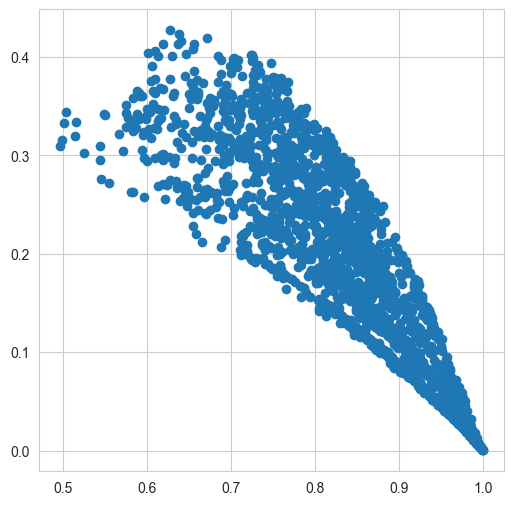

In [ ]:
plotting(walk_runDF,1024,1)

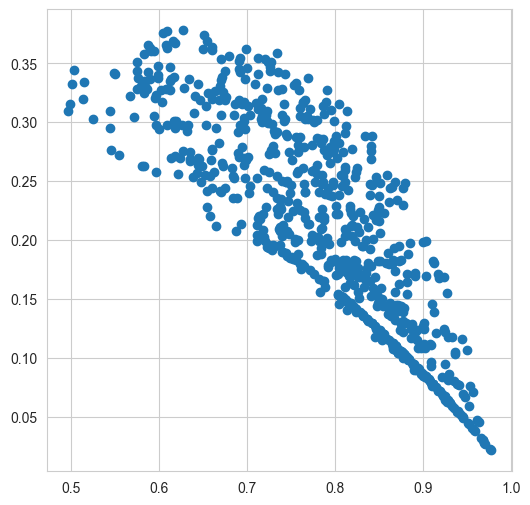

In [ ]:
plotting(walk_runDF.loc[walk_runDF['Delay'] ==1],1024,1)

# Plot for Climbing Up/Down

In [ ]:
climb_up_downDF = dataframeFill_climbing_down_up(actvity_dataframe)
climb_up_downDF

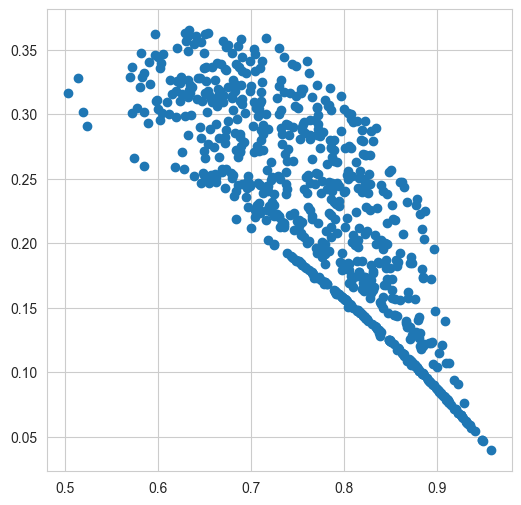

In [ ]:
plotting(climb_up_downDF,1024,1)

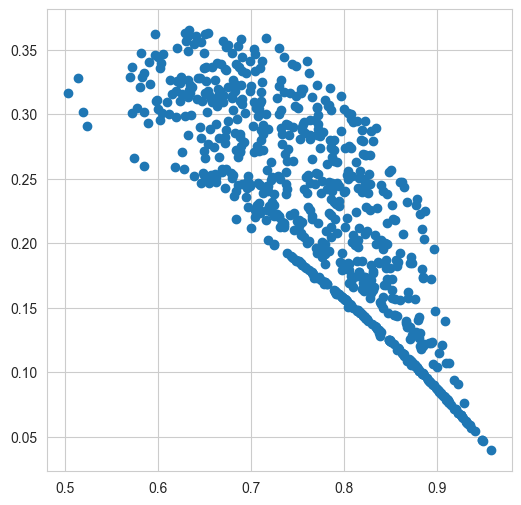

In [ ]:
plotting(climb_up_downDF.loc[climb_up_downDF['Delay']==1],1024,1)

# Combining 2 dataframes

In [ ]:
result = pd.concat([walk_runDF,climb_up_downDF])
result = result.sort_values(by=['Subject'])
result

,Subject,Accelerometer Axis,Signal_Length,Dimension,Delay,Permutation Entropy,Complexity,Activity,BodyPart
0,Subject1,attr_x,1024,3,1,0.914804,0.074950,Running,Chest
91,Subject1,attr_y,1024,5,2,0.796366,0.250170,Climbing Up,Chest
92,Subject1,attr_y,1024,5,3,0.862102,0.187786,Climbing Up,Chest
93,Subject1,attr_y,1024,6,1,0.638439,0.354074,Climbing Up,Chest
94,Subject1,attr_y,1024,6,2,0.779320,0.322096,Climbing Up,Chest
...,...,...,...,...,...,...,...,...,...
1246,Subject9,attr_y,1024,6,2,0.681441,0.358135,Climbing Up,Chest
1245,Subject9,attr_y,1024,6,1,0.603792,0.339631,Climbing Up,Chest
1244,Subject9,attr_y,1024,5,3,0.757627,0.278817,Climbing Up,Chest
1224,Subject9,attr_x,1024,3,1,0.871037,0.108551,Climbing Up,Chest


In [ ]:
subject1Df=walk_runDF.loc[walk_runDF['Subject'] =="Subject1"]
subject1Df

,Subject,Accelerometer Axis,Signal_Length,Dimension,Delay,Permutation Entropy,Complexity,Activity,BodyPart
0,Subject1,attr_x,1024,3,1,0.914804,0.074950,Running,Chest
1,Subject1,attr_x,1024,3,2,0.987806,0.011879,Running,Chest
2,Subject1,attr_x,1024,3,3,0.998621,0.001351,Running,Chest
3,Subject1,attr_x,1024,4,1,0.871776,0.144908,Running,Chest
4,Subject1,attr_x,1024,4,2,0.977961,0.028251,Running,Chest
...,...,...,...,...,...,...,...,...,...
139,Subject1,attr_z,1024,5,2,0.937265,0.105309,Walking,Head
140,Subject1,attr_z,1024,5,3,0.960280,0.070172,Walking,Head
141,Subject1,attr_z,1024,6,1,0.769732,0.337690,Walking,Head
142,Subject1,attr_z,1024,6,2,0.918619,0.174240,Walking,Head


# Updated Dataframes for all subjects

walking/running

In [ ]:
updated_df_ls = {}
for i in range(1,16):
    tempdf = walk_runDF.loc[walk_runDF['Subject'] ==f"Subject{i}"]
    delay1df = tempdf.loc[tempdf['Delay']==1]
    updated_df_ls[f"Subject {i}"]=(delay1df)

{'Subject 1':       Subject Accelerometer Axis Signal_Length Dimension Delay  \
0    Subject1             attr_x          1024         3     1   
3    Subject1             attr_x          1024         4     1   
6    Subject1             attr_x          1024         5     1   
9    Subject1             attr_x          1024         6     1   
12   Subject1             attr_y          1024         3     1   
15   Subject1             attr_y          1024         4     1   
18   Subject1             attr_y          1024         5     1   
21   Subject1             attr_y          1024         6     1   
24   Subject1             attr_z          1024         3     1   
27   Subject1             attr_z          1024         4     1   
30   Subject1             attr_z          1024         5     1   
33   Subject1             attr_z          1024         6     1   
36   Subject1             attr_x          1024         3     1   
39   Subject1             attr_x          1024         4     1

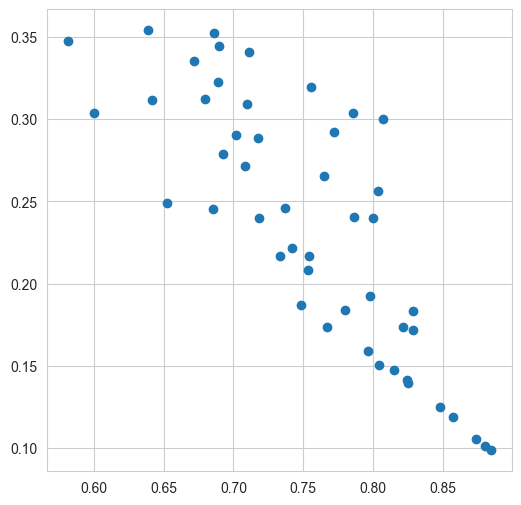

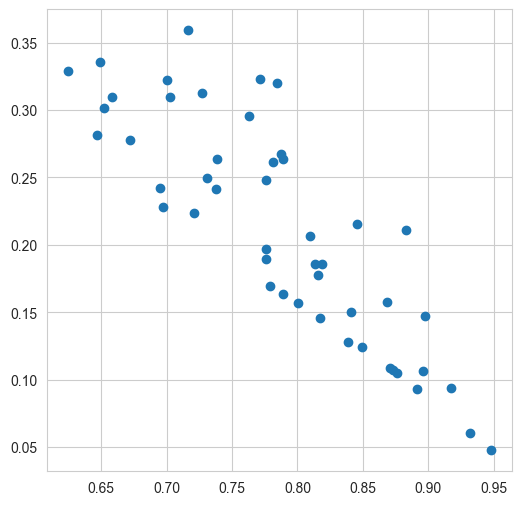

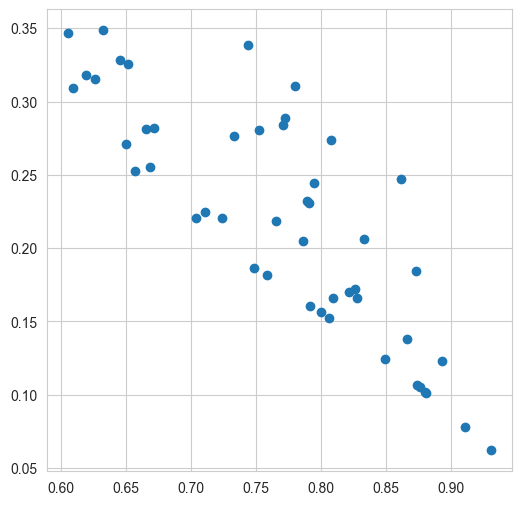

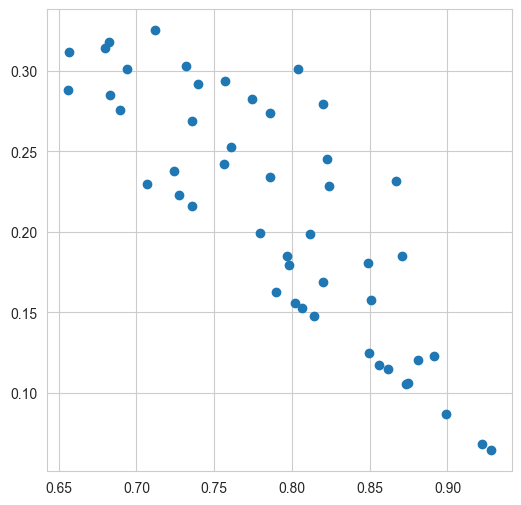

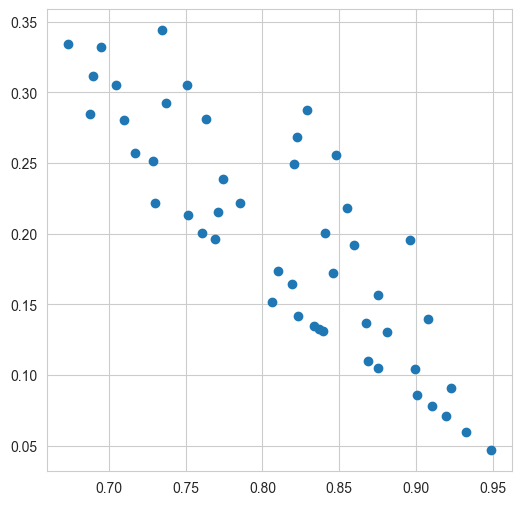

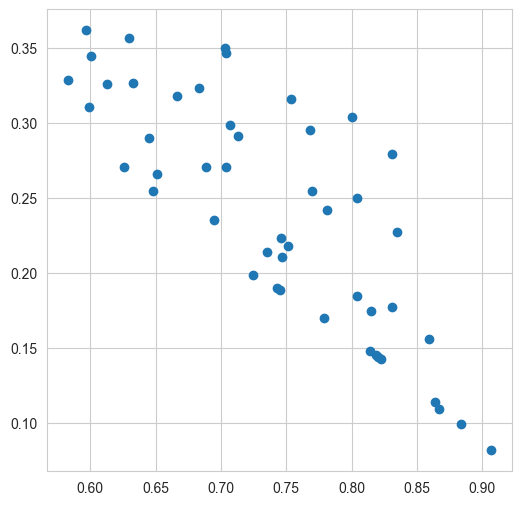

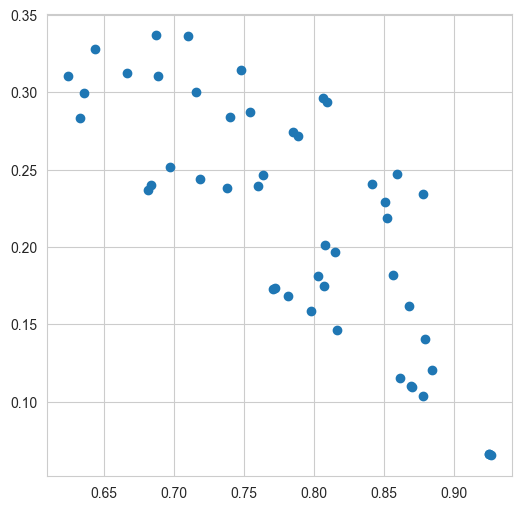

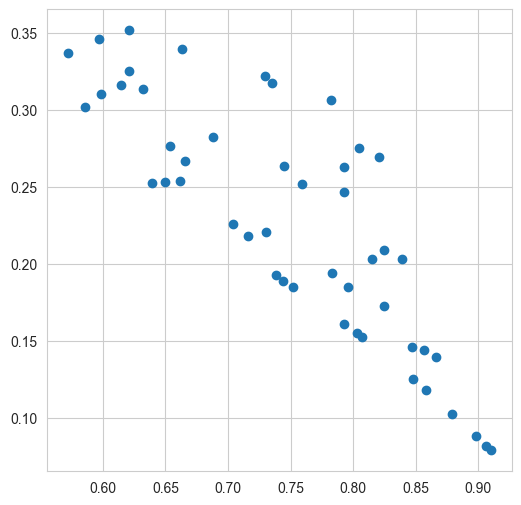

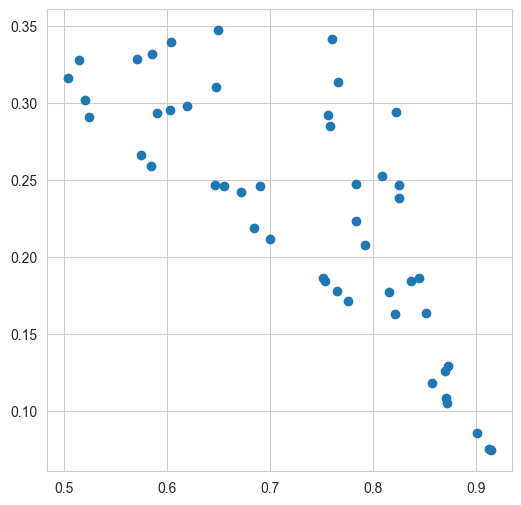

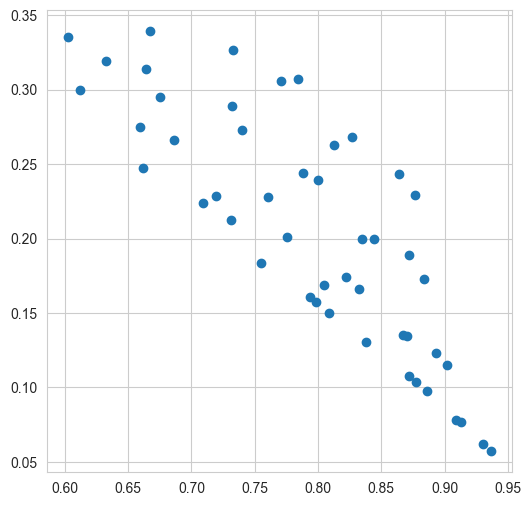

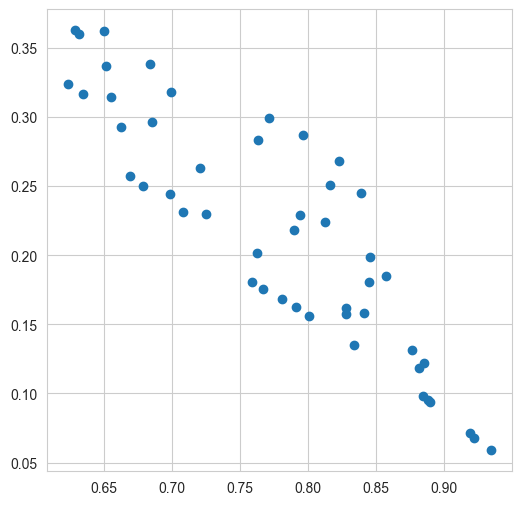

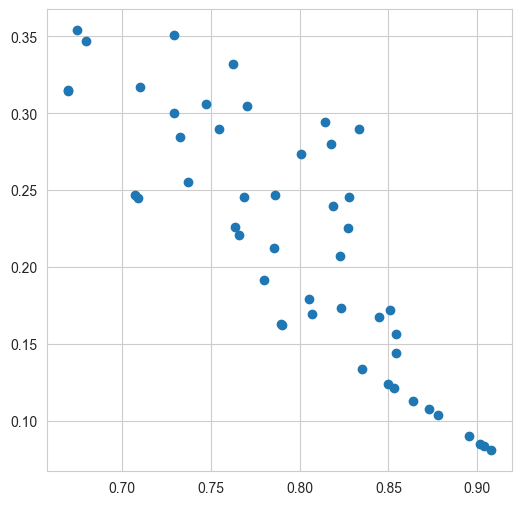

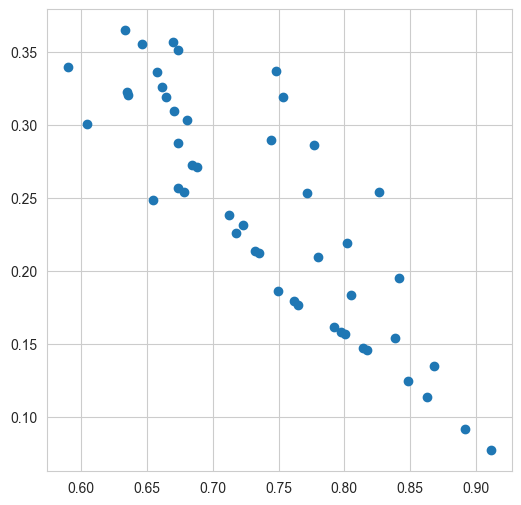

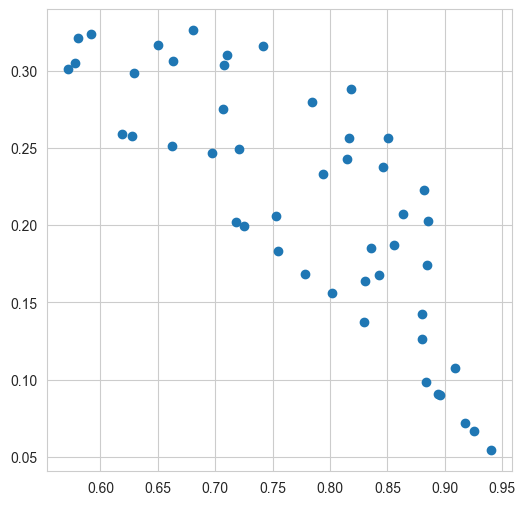

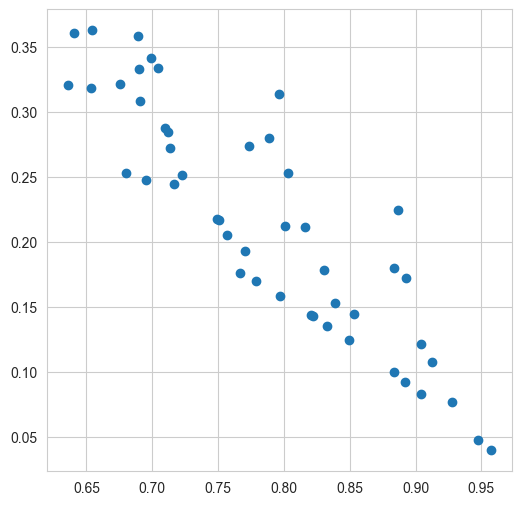

In [ ]:
for entry in updated_df_ls.values():
    plotting(entry,1,2)

 climbing up/down

In [ ]:
updated_df_ls = {}
for i in range(1,16):
    tempdf = climb_up_downDF.loc[walk_runDF['Subject'] ==f"Subject{i}"]
    delay1df = tempdf.loc[tempdf['Delay']==1]
    updated_df_ls[f"Subject {i}"]=(delay1df)

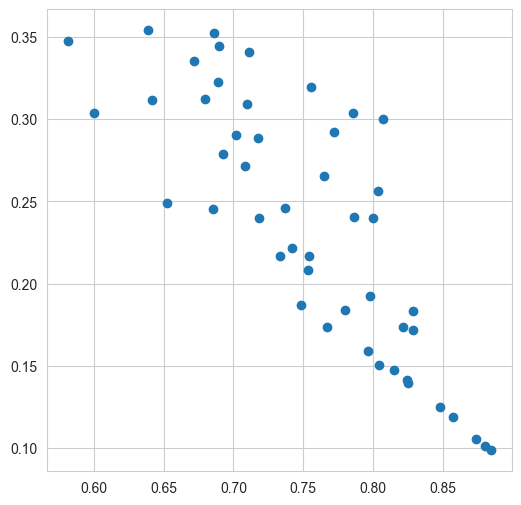

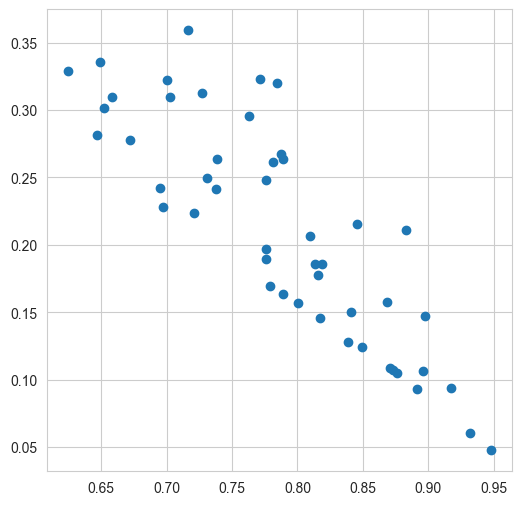

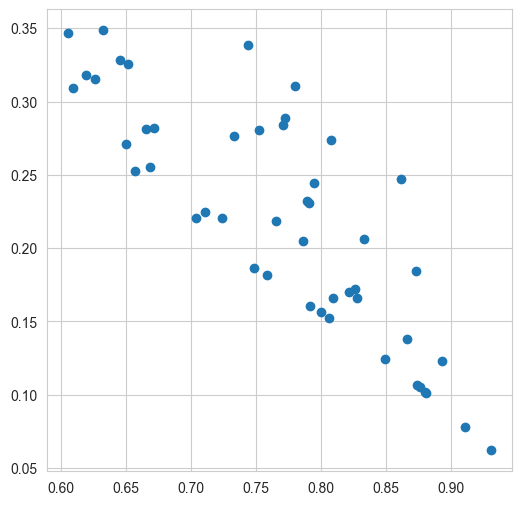

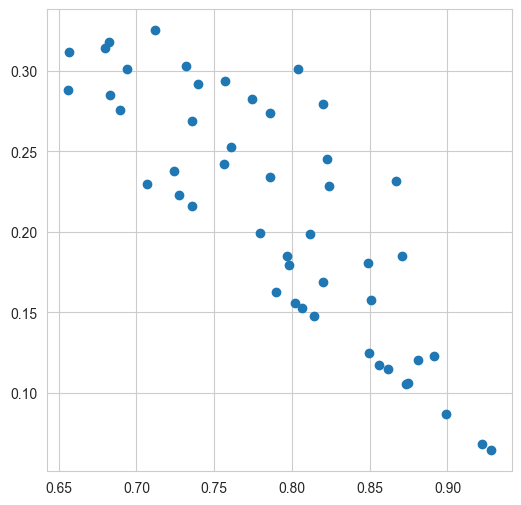

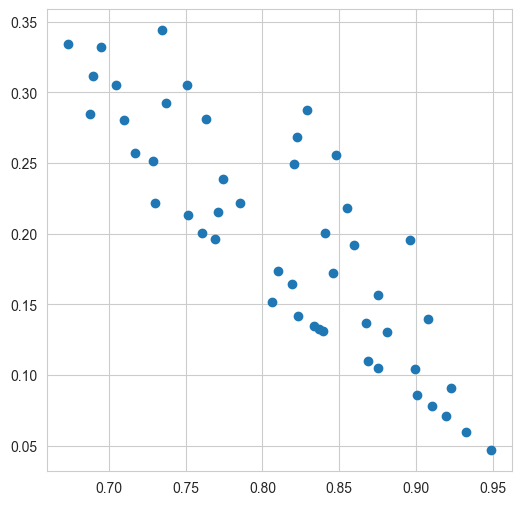

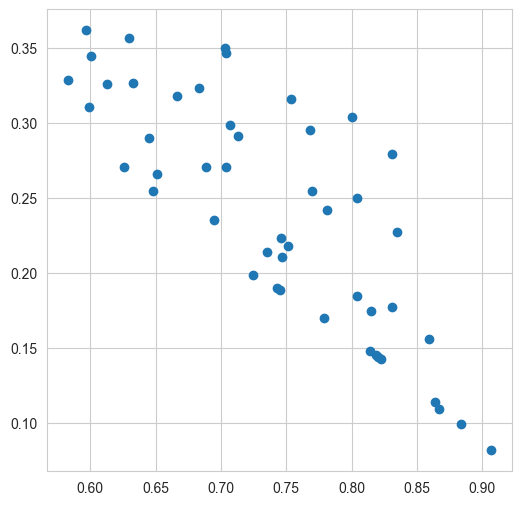

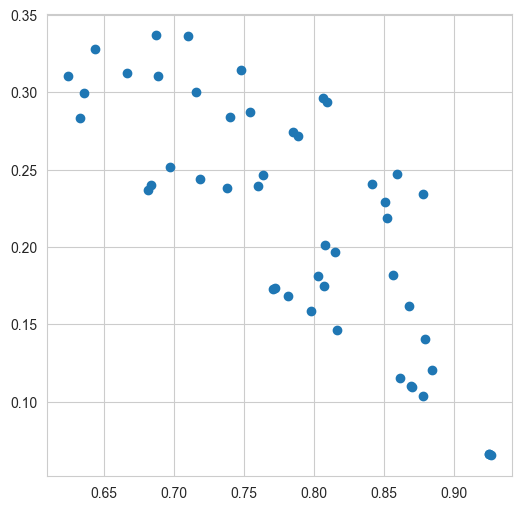

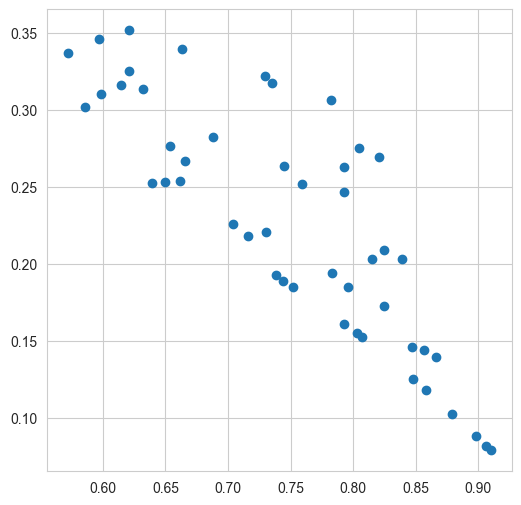

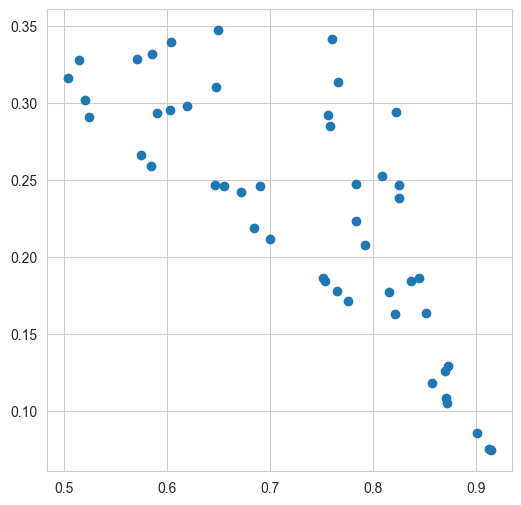

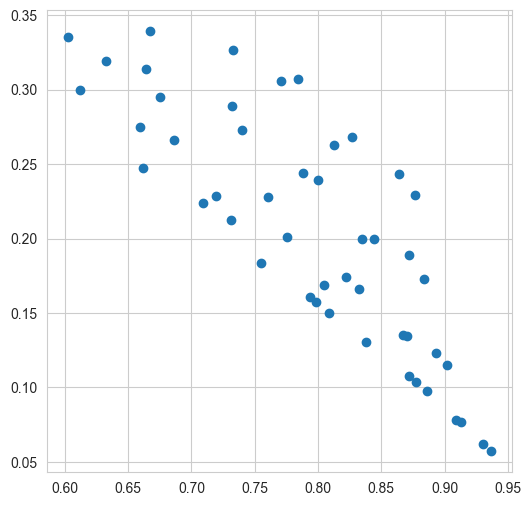

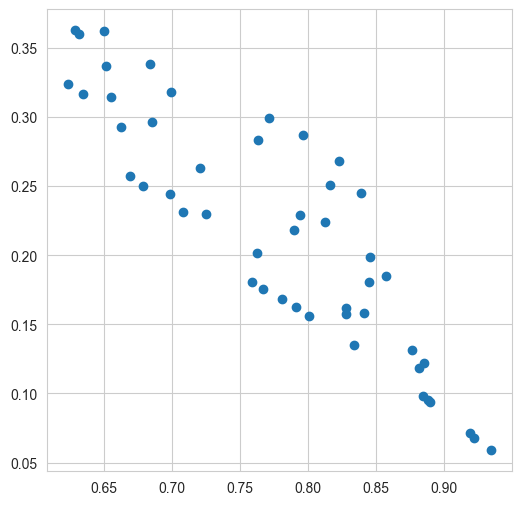

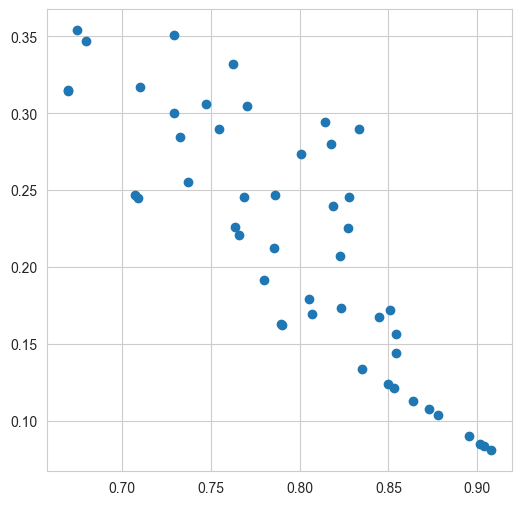

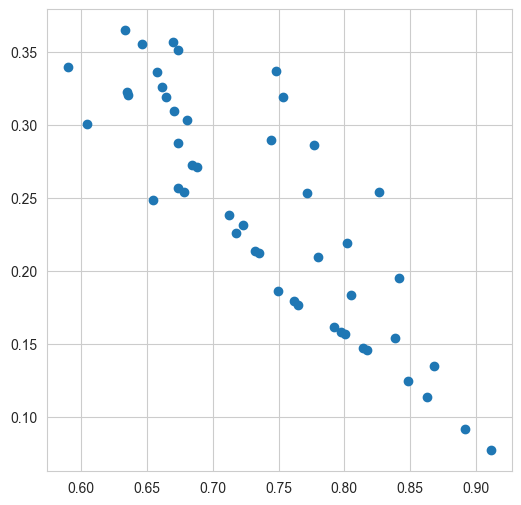

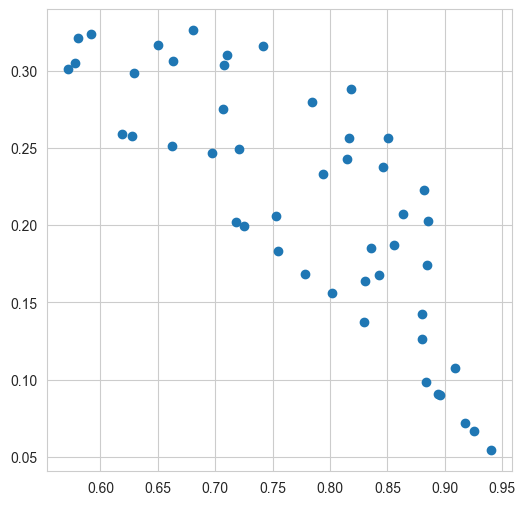

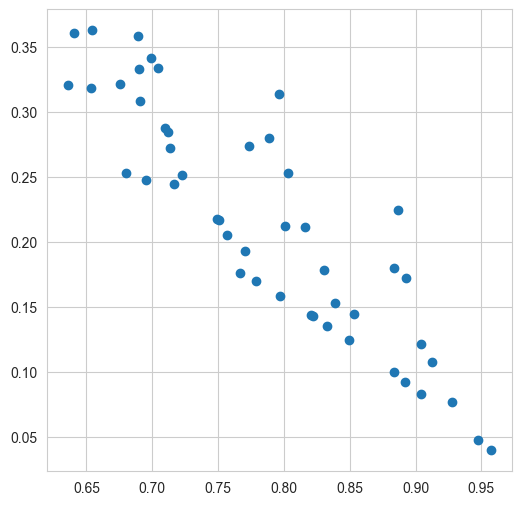

In [ ]:
for entry in updated_df_ls.values():
    plotting(entry,1,2)